In [84]:
import matplotlib.pylab as plt
import numpy as np

plt.rcParams.update({'font.size': 16})

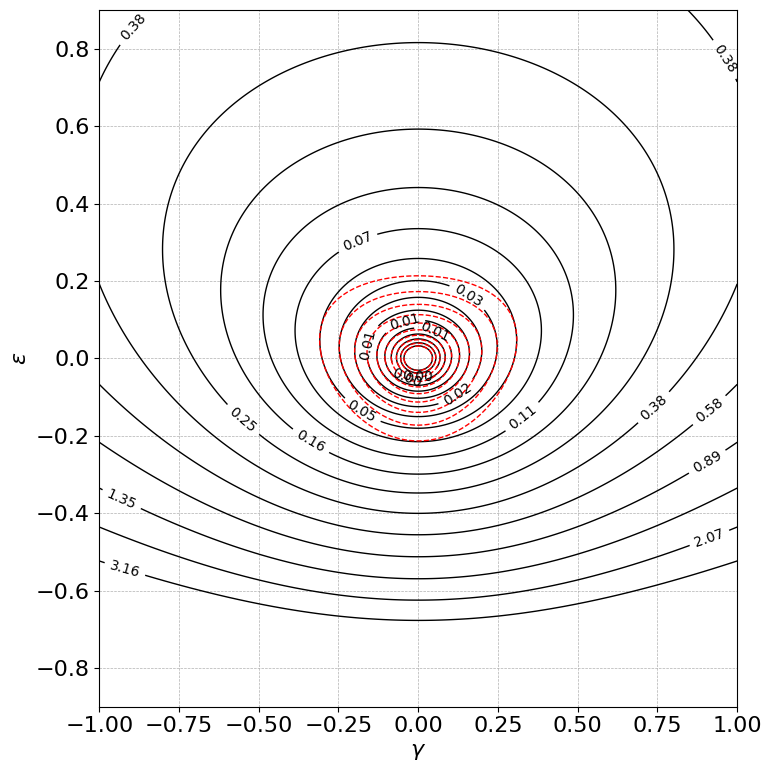

In [91]:

# Define range for sigma_2 and mu_2
#sigma2_vals = np.logspace(-1, 1, 300)
sigma2_vals = np.linspace(0.1, 1.9, 300)
mu2_vals = np.linspace(-1, 1, 300)

# Create meshgrid
S2, M2 = np.meshgrid(sigma2_vals, mu2_vals)

# Set sigma_1 = 1 and mu_1 = 0
sigma1 = 1
mu1 = 0

# Compute KL divergence
KL = np.log(S2 / sigma1) + (sigma1**2 + (mu1 - M2)**2) / (2 * S2**2) - 0.5

epsilon = S2 - 1
gamma = M2

# Correct perturbative KL expansion (matching KL(N1 || N2))
#KL_approx_correct = epsilon**2 + 0.5 * gamma**2#0.5 * gamma**2 - gamma**2 * epsilon + (1 + 1.5 * gamma**2) * epsilon**2


KL_approx_correct = epsilon**2+ gamma**2/2 - epsilon*gamma**2

# Plot contours of both exact KL and correct perturbative expansion
figsize=8
plt.figure(figsize=(figsize, figsize))

KL_contours = np.logspace(-3,0.5,20)


# Contours for exact KL divergence (black solid lines)
exact_contours = plt.contour(gamma, epsilon, KL, levels=KL_contours, colors='black', linestyles='solid', linewidths=1)
plt.clabel(exact_contours, inline=True, fontsize=10, fmt="%.2f")

# Contours for corrected perturbative KL divergence (red dashed lines)
perturbative_contours = plt.contour(gamma, epsilon, KL_approx_correct, levels=KL_contours[:10], colors='red', linestyles='dashed', linewidths=1)
#plt.clabel(perturbative_contours, inline=True, fontsize=8, fmt="%.2f")

#plt.yscale('log')
plt.xlabel(r'$\gamma$')
plt.ylabel(r'$\epsilon$')
#plt.title(r'KL Divergence')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('KL_epsilon_gamma.png')